# MFN vs TFN on ranking-based comparison with only 'useful' alter and at least 2 meetups

In [1]:
import numpy as np
import pandas as pd
import meetup_strategy as ms
import time 
import pickle
import util
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [2]:
import visualization as vs
from functools import reduce
import matplotlib.pyplot as plt
import pickle

# Global variables

In [24]:
placeid_path = "temp_data/gws-150/gowalla_placeidT_150.pickle"
MFN_H_path = "final/gws-150/gws-H-MFN.csv"
MFN_D_path = "final/gws-150/gws-D-MFN.csv"
MFN_24H_path = "final/gws-150/gws-24H-MFN.csv"
MFN_whole_path = "final/gws-150/gwsTOP10only-whole-MFN.csv"
MFN_TFN_path = "final/gws-150/gws-TFN.csv"

In [4]:
def transform_df(MFN_H_path):
    df_H_MFN = pd.read_csv(MFN_H_path)
    df_H_MFN = df_H_MFN[['Included Rank','userid_y', 'CCE_alters', 'CCE_ego_alters', 'Pi_alters', 'Pi_ego_alters', 
                                     'LZ_entropy', 'Pi', 'n_meetupers_x', 'n_meetupers_y', 'userid_x']]
    df_H_MFN = df_H_MFN.rename({'Included Rank': 'Included', 
                                'userid_x': 'userid',
                                'Pi': 'Pi_ego'}, axis=1)

    df_H_MFN['Pi_alters_ratio'] = df_H_MFN['Pi_alters'] / df_H_MFN['Pi_ego'] 
    df_H_MFN['Pi_ego_alters_ratio'] = df_H_MFN['Pi_ego_alters'] / df_H_MFN['Pi_ego'] 
    return df_H_MFN

## H-MFN details

In [5]:
df_H_MFN = transform_df(MFN_H_path)

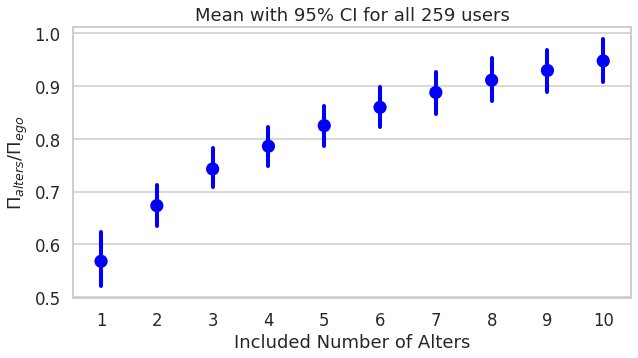

In [6]:
vs.cv_plot(df_H_MFN[df_H_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## 24H-MFN details

In [7]:
df_24H_MFN = transform_df(MFN_24H_path)

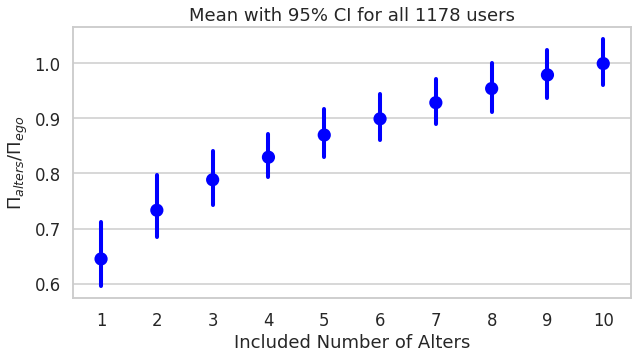

In [8]:
vs.cv_plot(df_24H_MFN[df_24H_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## D-MFN details

In [9]:
df_D_MFN = transform_df(MFN_D_path)

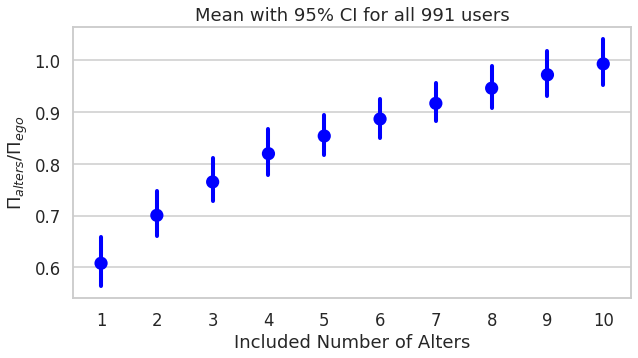

In [10]:
vs.cv_plot(df_D_MFN[df_D_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## TFN details

In [11]:
df_TFN = transform_df(MFN_TFN_path)

In [16]:
df_TFN

,Included,userid_y,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,LZ_entropy,Pi_ego,n_meetupers_x,n_meetupers_y,userid,Pi_alters_ratio,Pi_ego_alters_ratio,category
0,1,257,5.551141,4.935937,0.346086,0.441586,5.311483,0.384320,39,39,0,0.900513,1.149004,TFN
1,2,19,5.577398,4.875072,0.341805,0.450598,5.311483,0.384320,39,39,0,0.889376,1.172453,TFN
2,3,88,5.380523,4.806624,0.373453,0.460650,5.311483,0.384320,39,39,0,0.971723,1.198608,TFN
3,4,557,5.157035,4.727878,0.408234,0.472109,5.311483,0.384320,39,39,0,1.062223,1.228426,TFN
4,5,547,5.175870,4.762375,0.405346,0.467103,5.311483,0.384320,39,39,0,1.054708,1.215399,TFN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16211,1,118446,6.713398,5.363637,0.144307,0.384220,5.494065,0.363863,1,1,179308,0.396597,1.055949,TFN
16212,1,193837,7.209944,4.678419,0.105283,0.510526,4.687522,0.509324,1,1,179406,0.206712,1.002360,TFN
16213,1,126811,5.982204,5.982204,0.292043,0.292043,7.228819,0.006669,1,1,181338,43.791613,43.791613,TFN
16214,1,129502,6.711044,5.772051,0.089918,0.288569,5.957818,0.254613,1,1,181969,0.353158,1.133366,TFN


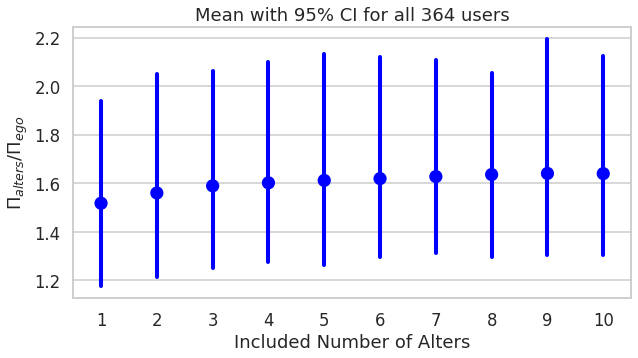

In [12]:
vs.cv_plot(df_TFN[df_TFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## Compare MFNs and TFN, different egos in these networks

In [63]:
df_H_MFN['category'] = 'CB-1H-MFN'
df_D_MFN['category'] = 'CB-1D-MFN'
df_24H_MFN['category'] = 'SW-24H-MFN'
df_TFN['category'] = 'TFN'

In [64]:
all_networks = pd.concat([df_H_MFN, df_24H_MFN, df_D_MFN, df_TFN])

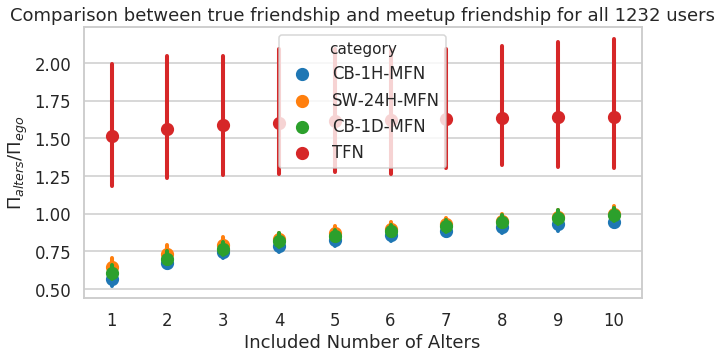

In [65]:
vs.cv_compare_plot(all_networks[all_networks['n_meetupers_x'] >=10], threshold=10, 
                   mode='talk', l=10, w=5)

## Compare MFNs and TFN, shared egos in both networks

In [72]:
df_all_MFN = transform_df(MFN_whole_path)
df_all_MFN['category'] = 'WT-MFN'

In [73]:
share_users_total = list(set(df_24H_MFN['userid'].tolist()) & 
                   set(df_H_MFN['userid'].tolist()) & 
                   set(df_D_MFN['userid'].tolist()) &
                   set(df_TFN['userid'].tolist()))
len(share_users_total)

2648

In [74]:
share_users = list(set(df_24H_MFN[df_24H_MFN['n_meetupers_x'] >=10]['userid'].tolist()) & 
                   set(df_H_MFN[df_H_MFN['n_meetupers_x']>=10]['userid'].tolist()) & 
                   set(df_D_MFN[df_D_MFN['n_meetupers_x']>=10]['userid'].tolist()) &
                   set(df_TFN[df_TFN['n_meetupers_x']>=10]['userid'].tolist()) 
                  )
len(share_users)

145

In [22]:
# with open('temp_data/gws-150/gws-150-whole/gws_top10_ego.txt', 'a+') as outfile:
#     for i in range(len(share_users)):
#         outfile.write(str(int(share_users[i])) + '\n')

In [75]:
share_network = pd.concat([df_24H_MFN[df_24H_MFN['userid'].isin(share_users)], 
                           df_H_MFN[df_H_MFN['userid'].isin(share_users)],
                           df_D_MFN[df_D_MFN['userid'].isin(share_users)],
                           df_TFN[df_TFN['userid'].isin(share_users)],
                           df_all_MFN
                          ])

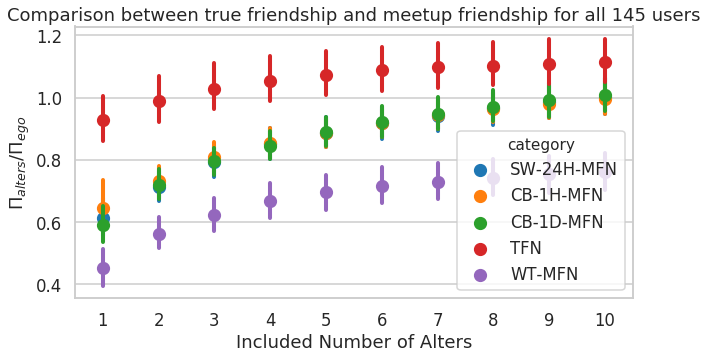

In [76]:
# vs.cv_compare_plot(share_network[share_network['n_meetupers_x'] >=10], threshold=10, mode='talk', l=10, w=5)
vs.cv_compare_plot(share_network, threshold=10, mode='talk', l=10, w=5)

In [77]:
share_network.to_csv('final/gws-150/gws_shared_all.csv', index=False)

# Check these friendship networks (Basic)

In [30]:
print(len(df_24H_MFN), len(df_D_MFN), len(df_H_MFN), len(df_TFN))

86403 74380 16421 16216


In [31]:
print(df_24H_MFN['userid'].nunique(), df_D_MFN['userid'].nunique(), df_H_MFN['userid'].nunique(), df_TFN['userid'].nunique())

4946 4715 2906 3965


In [32]:
n_meetupers_24H = df_24H_MFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_24H['category'] = '24H-MFN'

n_meetupers_D = df_D_MFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_D['category'] = 'D-MFN'

n_meetupers_H = df_H_MFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_H['category'] = 'H-MFN'

n_meetupers_TFN = df_TFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_TFN['category'] = 'TFN'

In [33]:
n_meetupers_ego = pd.concat([n_meetupers_24H, n_meetupers_D, n_meetupers_H, n_meetupers_TFN
                            ]
                           )

Text(0.5, 1.0, 'The average number of alters for each ego (all users)')

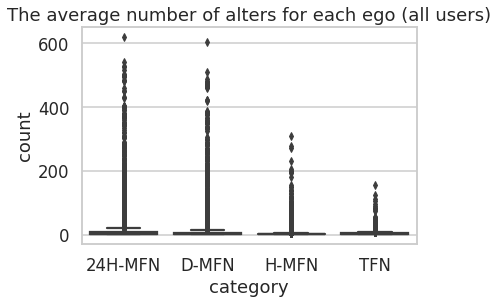

In [34]:
sns.boxplot(data=n_meetupers_ego, x='category', y = 'count').set_title("The average number of alters for each ego (all users)")

In [35]:
print(df_24H_MFN.groupby('userid')['userid_y'].count().sum()/df_24H_MFN['userid'].nunique(),
      df_D_MFN.groupby('userid')['userid_y'].count().sum()/df_D_MFN['userid'].nunique(),
      df_H_MFN.groupby('userid')['userid_y'].count().sum()/df_H_MFN['userid'].nunique(),
      df_TFN.groupby('userid')['userid_y'].count().sum()/df_TFN['userid'].nunique(),
)

17.46926809543065 15.775185577942736 5.650722642807984 4.089785624211854


# Check these friendship networks on shared users (total)

In [36]:
len(share_users_total)

2648

In [37]:
share_network_total = pd.concat([df_24H_MFN[df_24H_MFN['userid'].isin(share_users_total)], 
                           df_H_MFN[df_H_MFN['userid'].isin(share_users_total)],
                           df_D_MFN[df_D_MFN['userid'].isin(share_users_total)],
                           df_TFN[df_TFN['userid'].isin(share_users_total)]
                          ])

In [38]:
share_network_total.groupby('category').size()

category
24H-MFN    71914
D-MFN      63452
H-MFN      15332
TFN        12904
dtype: int64

In [39]:
n_meetuper_total_shared_ego = share_network_total.groupby(['category', 'userid'])['Included'].count().reset_index(name='count')

Text(0.5, 1.0, 'The average number of alters for each ego (all shared users)')

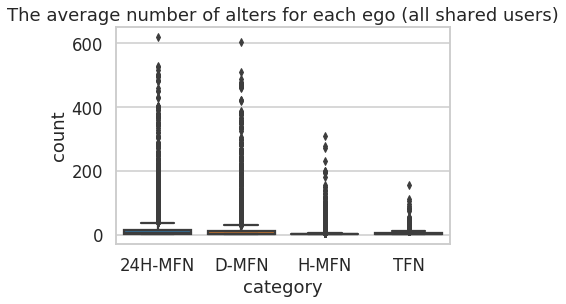

In [40]:
sns.boxplot(data=n_meetuper_total_shared_ego, x='category', 
            y = 'count').set_title("The average number of alters for each ego (all shared users)")

In [41]:
n_meetuper_total_shared_ego.groupby('category')['count'].sum()/len(share_users_total)

category
24H-MFN    27.157855
D-MFN      23.962236
H-MFN       5.790030
TFN         4.873112
Name: count, dtype: float64

# Check these friendship networks on shared users (>=10 meetupers)

In [42]:
len(share_users)

145

In [43]:
share_network.groupby('category').size()

category
24H-MFN    30207
All-MFN     1595
D-MFN      27839
H-MFN       7254
TFN         3793
dtype: int64

In [44]:
n_meetuper_shared_ego = share_network[share_network['category'] != 'All-MFN'
                                     ].groupby(['category', 'userid'])['Included'].count().reset_index(name='count')

Text(0.5, 1.0, 'The average number of alters for each ego \n (Shared users with >= 10 meetupers)')

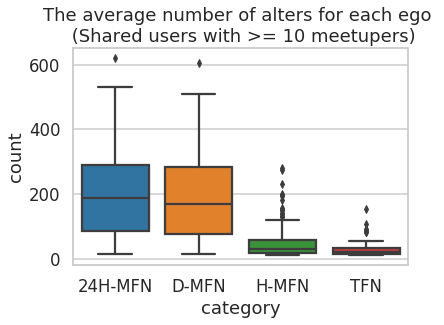

In [45]:
sns.boxplot(data=n_meetuper_shared_ego, x='category', 
            y = 'count').set_title("The average number of alters for each ego \n (Shared users with >= 10 meetupers)")

In [46]:
n_meetuper_shared_ego.groupby('category')['count'].sum()/len(share_users)

category
24H-MFN    208.324138
D-MFN      191.993103
H-MFN       50.027586
TFN         26.158621
Name: count, dtype: float64

# Check these friendship network only on top-10 friends

In [47]:
VIP_network = share_network[share_network['Included'] <=10]

In [62]:
VIP_network.to_csv('final/gws-150/gws_VIP.csv', index=False)

In [48]:
VIP_network_24H_MFN = VIP_network[VIP_network['category'] == '24H-MFN'][['Included','userid', 'userid_y']]
VIP_network_D_MFN = VIP_network[VIP_network['category'] == 'D-MFN'][['Included', 'userid', 'userid_y']]
VIP_network_H_MFN = VIP_network[VIP_network['category'] == 'H-MFN'][['Included', 'userid', 'userid_y']]
VIP_network_TFN = VIP_network[VIP_network['category'] == 'TFN'][['Included', 'userid', 'userid_y']]
VIP_network_All_MFN = VIP_network[VIP_network['category'] == 'All-MFN'][['Included','userid', 'userid_y']]

In [49]:
VIP_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Included','userid'],
                                                how='left'), [VIP_network_All_MFN,
                                                              VIP_network_24H_MFN, 
                                                              VIP_network_D_MFN,
                                                              VIP_network_H_MFN,
                                                              VIP_network_TFN])
VIP_merged.columns = ['Included', 'userid', 'All-MFN' ,'24H-MFN', 'D-MFN', 'H-MFN', 'TFN']

### Gobal Jaccard similarity for all alters in these networks

In [78]:
VIP_similarity = util.jaccard_pandas_similarity(VIP_merged[VIP_merged.columns[-5:]])
VIP_similarity = pd.DataFrame(VIP_similarity, columns=['WT-MFN','SW-24H-MFN', 'CB-1D-MFN', 'CB-1H-MFN', 'TFN'])
VIP_similarity.index = ['WT-MFN','SW-24H-MFN', 'CB-1D-MFN', 'CB-1H-MFN', 'TFN']

In [79]:
pickle_out = open("final/gws-150/gws_VIP_similarity.pickle", "wb")
pickle.dump(VIP_similarity, pickle_out)
pickle_out.close()

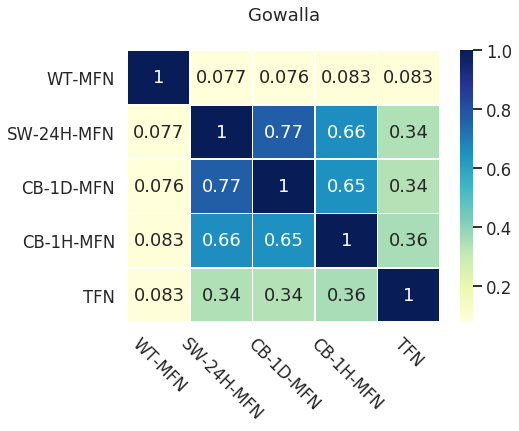

In [80]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(VIP_similarity , cmap="YlGnBu", ax=ax,
            linewidths=.5, annot=True)
# ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=-45)
ax.set_title('Gowalla', pad=30)
plt.show()

### Focus on each egos in these networks

In [52]:
individual_similarity = {user: util.jaccard_pandas_similarity(VIP_merged[VIP_merged['userid'] == user]
                                                              [['All-MFN', '24H-MFN', 'D-MFN', 
                                                                'H-MFN', 'TFN']]) for user in share_users}

In [53]:
df_individual_similarity = pd.DataFrame(np.transpose(np.array([
    [individual_similarity[user][0][1] for user in share_users],
    [individual_similarity[user][0][2] for user in share_users],
    [individual_similarity[user][0][3] for user in share_users],
    [individual_similarity[user][0][4] for user in share_users],
    [individual_similarity[user][1][2] for user in share_users],
    [individual_similarity[user][1][3] for user in share_users],
    [individual_similarity[user][1][4] for user in share_users],
    [individual_similarity[user][2][3] for user in share_users],
    [individual_similarity[user][2][4] for user in share_users],
    [individual_similarity[user][3][4] for user in share_users]
])), columns=['All_vs_24H',
              'All_vs_D',
              'All_vs_H',
              'All_vs_TFN',
           '24H_vs_D',
           '24H_vs_D',
           '24H_vs_TFN',
           'D_vs_H',
           'D_vs_TFN',
           'H_vs_TFN']
)

In [54]:
df_individual_similarity = pd.concat([
                           pd.DataFrame([['All_vs_24H', individual_similarity[user][0][1]] for user in share_users], 
                                         columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['All_vs_D', individual_similarity[user][0][2]] for user in share_users], 
                                         columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['All_vs_H', individual_similarity[user][0][3]] for user in share_users], 
                                         columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['All_vs_TFN', individual_similarity[user][0][4]] for user in share_users], 
                                         columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['24H_vs_D', individual_similarity[user][1][2]] for user in share_users], 
                                         columns=['Compare', 'Jaccard']), 
                           pd.DataFrame([['24H_vs_H', individual_similarity[user][1][3]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['24H_vs_TFN', individual_similarity[user][1][4]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['D_vs_H', individual_similarity[user][2][3]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['D_vs_TFN', individual_similarity[user][2][4]] for user in share_users],
                                        columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['H_vs_TFN', individual_similarity[user][3][4]] for user in share_users], 
                                       columns=['Compare', 'Jaccard'])
                                        ]
                                    )

In [55]:
df_individual_similarity 

,Compare,Jaccard
0,All_vs_24H,0.111111
1,All_vs_24H,0.000000
2,All_vs_24H,0.176471
3,All_vs_24H,0.000000
4,All_vs_24H,0.000000
...,...,...
140,H_vs_TFN,0.111111
141,H_vs_TFN,0.250000
142,H_vs_TFN,0.428571
143,H_vs_TFN,0.818182


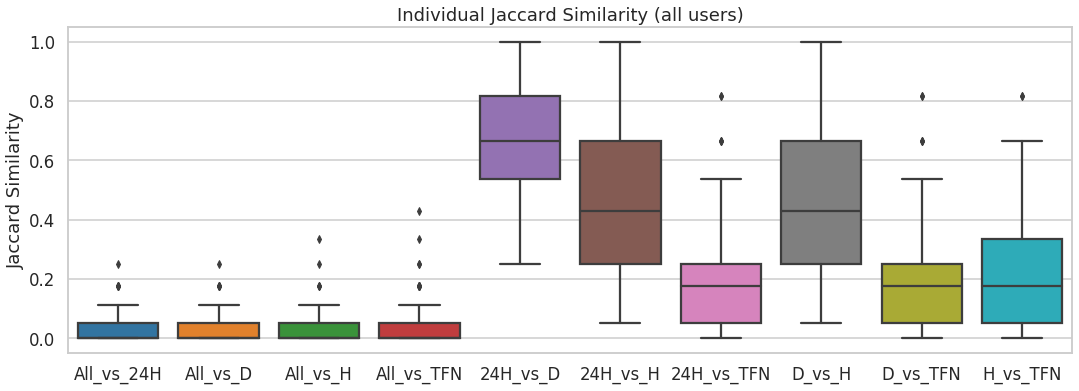

In [56]:
fig, ax = plt.subplots(figsize=(18, 6))
ax = sns.boxplot(data=df_individual_similarity , x='Compare', 
            y = 'Jaccard')
ax.set_title('Individual Jaccard Similarity (all users)')
ax.set_xlabel('')
ax.set_ylabel('Jaccard Similarity')
plt.show()

### Check Shared-Location rate (What does mean high ranking alter?)

In [57]:
VIP_Rank = VIP_network[['Included', 'userid', 'userid_y', 'category']]

In [58]:
pickle_in = open(placeid_path, "rb")
placeidT = pickle.load(pickle_in)
pickle_in.close()

In [59]:
VIP_rate = VIP_Rank.copy()
VIP_rate['USLR'] = VIP_Rank.apply(lambda row:util.shared_location_rate(row.userid, row.userid_y, placeidT)[0], axis=1)
VIP_rate['SLR'] = VIP_Rank.apply(lambda row:util.shared_location_rate(row.userid, row.userid_y, placeidT)[1], axis=1)

In [60]:
VIP_rate

,Included,userid,userid_y,category,USLR,SLR
0,1,0.0,267.0,24H-MFN,0.333333,0.493333
1,2,0.0,547.0,24H-MFN,0.118519,0.280000
2,3,0.0,515.0,24H-MFN,0.222222,0.368889
3,4,0.0,66.0,24H-MFN,0.140741,0.288889
4,5,0.0,327.0,24H-MFN,0.088889,0.231111
...,...,...,...,...,...,...
1589,6,10971.0,102427.0,All-MFN,0.012637,0.008276
1590,7,10971.0,79873.0,All-MFN,0.007582,0.006437
1591,8,10971.0,49170.0,All-MFN,0.005055,0.005977
1592,9,10971.0,143403.0,All-MFN,0.001685,0.000920


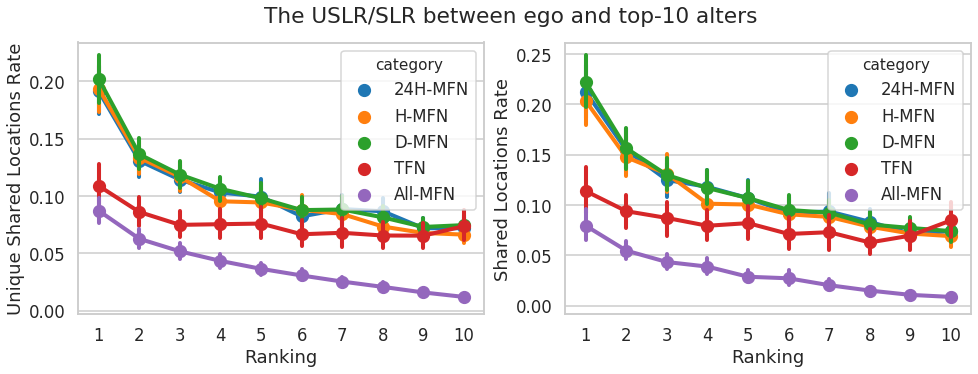

In [61]:
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 5))
fig.suptitle("The USLR/SLR between ego and top-10 alters")

sns.pointplot(x="Included", y="USLR", 
              data=VIP_rate, 
              hue='category', ci=95, join='True', ax=ax1)
ax1.set_ylabel('Unique Shared Locations Rate')
ax1.set_xlabel('Ranking')

sns.pointplot(x="Included", y="SLR", 
              data=VIP_rate, 
              hue='category', ci=95, join='True', ax=ax2)
ax2.set_ylabel('Shared Locations Rate')
ax2.set_xlabel('Ranking')
plt.show()